10.0 4.0 -11.0 -10.0
Enter Value of K: 2
[[0.41150377761027457, -6.1028286086868535], [-2.0851305942682057, 1.826865852478651]]


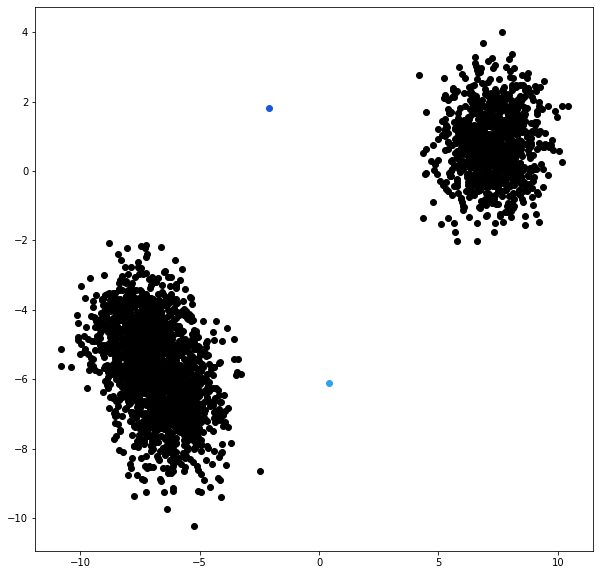

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

def dis(x1,y1,x2,y2):
    return np.sqrt((np.power(x1-x2,2))+(np.power(y1-y2,2)));

def identical(l1,l2):
    flag=1
    for element1,element2 in zip(l1,l2):
        if element1!=element2:
            flag=0
            break
    return flag

df=pd.read_csv('data.txt',sep=' ',header=None,names=['x','y'])
xMin=np.round(df['x'].min());
yMin=np.round(df['y'].min());
xMax=np.round(df['x'].max());
yMax=np.round(df['y'].max());


print(xMax,yMax,xMin,yMin)
np.random.seed(100)


k=int(input('Enter Value of K: '))
centroids=[]
for i in range(k):
    centroids.append([np.random.uniform(xMin, xMax), np.random.uniform(yMin, yMax)])
print(centroids)

plt.figure(figsize=(10,10))
plt.scatter(df['x'],df['y'],color='black')


number_of_colors = k

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
i=0
for x,y in centroids:
    plt.scatter(x,y,c=color[i])
    i=i+1

plt.show()    




In [17]:
data=df.values
cluster=[]
for x1,y1 in data:
    distance=[]
    i=0
    for x2,y2 in centroids:
        i=i+1
        distance.append([i,dis(x1,y1,x2,y2)])
    distance.sort(key=lambda x: x[1])
    cluster.append([x1,y1,distance[0][0]])
    
print(cluster)    
    
    
        
        
    


[[-7.871569999999999, -4.86573, 1], [-4.76661, -6.87944, 1], [-6.679860000000001, -5.8308, 1], [-8.93021, -4.15571, 2], [-7.91375, -4.2284, 2], [5.8628800000000005, 0.9979, 2], [-7.6157, -6.0056199999999995, 1], [8.07681, 0.16283, 1], [5.76394, -0.4406, 1], [-5.0452699999999995, -6.04326, 1], [-5.9452300000000005, -7.277189999999999, 1], [7.682289999999999, 1.8732099999999998, 2], [-7.164510000000001, -4.5570699999999995, 1], [-5.52871, -6.98528, 1], [-5.1576699999999995, -4.79025, 1], [-6.580769999999999, -6.980980000000001, 1], [6.9194, 1.8640700000000001, 2], [-6.638330000000001, -5.2240400000000005, 1], [7.84315, 0.71741, 2], [-8.62059, -4.52196, 2], [7.7138100000000005, 0.67403, 2], [7.55081, -0.13926, 1], [-6.12205, -6.32135, 1], [-8.524189999999999, -3.8065, 2], [-6.611739999999999, -7.29484, 1], [5.96309, 1.11874, 2], [-5.489, -5.65873, 1], [-7.88635, -6.18173, 1], [-6.94976, -3.6736800000000005, 2], [-8.632539999999999, -6.5259, 1], [-5.89133, -7.04173, 1], [-5.55773, -4.0356,

In [18]:
def updateCentroid(cluster,k):
#     print(data,cluster)
    xSum=np.zeros(k)
    ySum=np.zeros(k)
    count=np.zeros(k)
    updated_centroids=[]
    for i in range(k):
        c=0
        for x,y,cl in cluster:
            if cl==i+1:
                xSum[i]=xSum[i]+x
                ySum[i]=ySum[i]+y
                c=c+1
                count[i]=c
        updated_centroids.append([xSum[i]/count[i],ySum[i]/count[i]])
    return updated_centroids


updatedCentroid=updateCentroid(cluster,k)
print(updatedCentroid)
    
                
    
                
            
        
    
    



    

[[-4.20515203578337, -5.04025409574469], [2.4467726287553653, -0.2535586480686697]]


In [19]:
cluster=np.array(cluster)
centroids=np.array(updatedCentroid)
zzz=0
while True:
    zzz=zzz+1
    print(zzz)
    old_cluster=np.array(cluster)
    centroids=np.array(updatedCentroid)
    data=df.values
    cluster=[]
    for x1,y1 in data:
        distance=[]
        i=0
        for x2,y2 in centroids:
            i=i+1
            distance.append([i,dis(x1,y1,x2,y2)])
        distance.sort(key=lambda x: x[1])
        cluster.append([x1,y1,distance[0][0]])
    cluster=np.array(cluster)
    if identical(old_cluster[:,len(cluster[0])-1],cluster[:,len(cluster[0])-1])==1:
        break
    
    
    

1
2


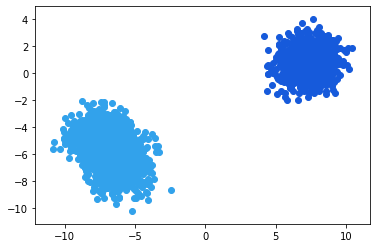

In [20]:
for x,y,l in cluster:
    for i in range(k):
        if l==(i+1):
            plt.scatter(x,y,c=color[i])
plt.show()
            
            